<a href="https://colab.research.google.com/github/Ciastkk45/kursAI-sb10/blob/main/6_klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

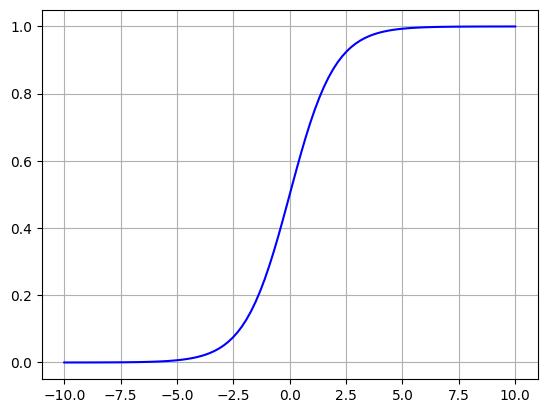

In [3]:
#funkcja logistyczna(sigmoidalna)
import matplotlib.pyplot as plot
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y, color="blue")
plt.grid()
plt.show()

<ipython-input-8-095d496cf6ed>:71: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z_prob, levels=[0.25,0.5,0.75], color=["red","purple","red"], linestyles = ["--","-","--"], linewidths=[1,2,1])
<ipython-input-8-095d496cf6ed>:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


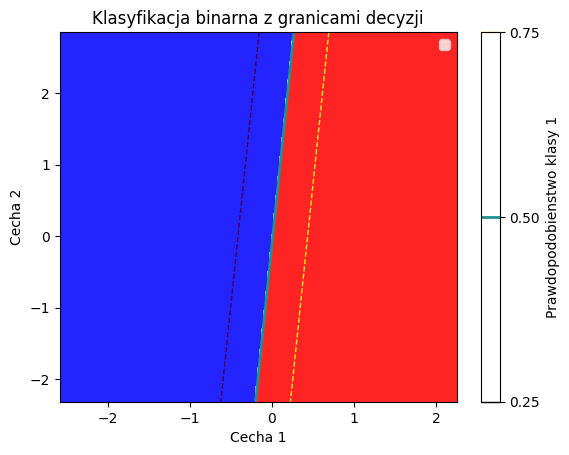

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import random

def create_train_and_test_sets(X,Y):
  random.seed(42)
  X = np.array(X)
  Y = np.array(Y)

  indicies = np.arange(len(X))
  np.random.shuffle(indicies)

  split_plot = int(0.8*len(X))

  train_indicies = indicies[:split_plot]
  test_indicies = indicies[split_plot:]

  X_train = X[train_indicies]
  Y_train = Y[train_indicies]
  X_test = X[test_indicies]
  Y_test = Y[test_indicies]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import random

def create_train_and_test_sets(X,Y):
  random.seed(42)
  X = np.array(X)
  Y = np.array(Y)

  indicies = np.arange(len(X))
  np.random.shuffle(indicies)

  split_plot = int(0.8*len(X))

  train_indicies = indicies[:split_plot]
  test_indicies = indicies[split_plot:]

  X_train = X[train_indicies]
  Y_train = Y[train_indicies]
  X_test = X[test_indicies]
  Y_test = Y[test_indicies]

  return X_train, Y_train, X_test, Y_test

def zscore_normalization(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  return (X-mean)/std

def plot_regression(X_train, Y_train, X_test, Y_test, Y_test_pred, model):
  x_min = min(X_train[:,0].min(), X_test[:,0].min())
  x_max = max(X_train[:,0].max(), X_test[:,0].max())
  y_min= min(X_train[:,1].min(), X_test[:,1].min())
  y_max = max(X_train[:,1].max(), X_test[:,1].max())
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy,Z, cmap=plt.cm.bwr)

  Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
  Z_prob = Z_prob.reshape(xx.shape)

  plt.contour(xx, yy, Z_prob, levels=[0.25,0.5,0.75], color=["red","purple","red"], linestyles = ["--","-","--"], linewidths=[1,2,1])

  plt.xlabel("Cecha 1")
  plt.ylabel("Cecha 2")
  plt.title("Klasyfikacja binarna z granicami decyzji")
  plt.legend()
  plt.colorbar(label="Prawdopodobienstwo klasy 1")
  plt.show()

  pass


X,Y= make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

X = zscore_normalization(X)

X_train, Y_train, X_test, Y_test = create_train_and_test_sets(X,Y)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
plot_regression(X_train, Y_train, X_test, Y_test, Y_test_pred, model)
